## Wine Data

This data set is a collection wines and their attributes. Each attribute represents a particular wine and it's characteristics. 

In [489]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv')
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,-0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,-1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,-1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


## EDA

This data set contains over 12,700 wines and lists all the their specfic attirbutes. The attributes given here are:
1. INDEX	- index of the wine bottle 
2. TARGET	- number of cases sold
3. FixedAcidity	- fixed acidity content
4. VolatileAcidity	- volatile acidity content
5. CitricAcid	- citric acid content
6. ResidualSugar	- residual sugar content
7. Chlorides	- chloride content
8. FreeSulfurDioxide	- free sulfur dioxide content
9. TotalSulfurDioxide	- the total sulfur dioxide content
10. Density	- density of wine
11. pH	- acidity of wine (measured in pH)
12. Sulphates	- sulphate content
13. Alcohol	- alcohol content
14. LabelAppeal	- design appeal of label
15. AcidIndex	STARS - rating of acid index 

Looking specifically at attributes of the wines, we begin to analyze the different aspects.

For example lets take a look at the number of wines and their target scores, which represents how many cases of said wine were sold

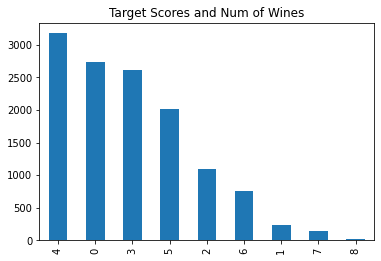

In [490]:
%matplotlib inline

tplt = df['TARGET'].value_counts().plot.bar(title = "Target Scores and Num of Wines")
tplt;

We can see here that the majority of wines made it within the 4 target score. 

Using this information we can try and find different trends within the data set. For example, lets see how the alcohol content of a wine is related to their target score

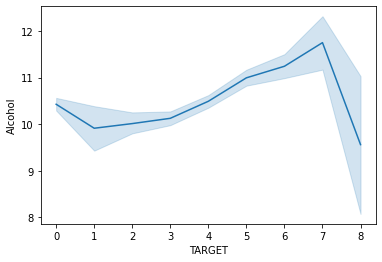

In [491]:
sns.lineplot(data=df['TARGET'], x=df['TARGET'], y=df['Alcohol'])

So based on this graph we can see that the higher the target score, the higher the alcohol content tends to be. Which, if you happened to be a wine maker, would be a benefit for you. 

While we're on the topic let's see the distribution of alcohol levels in general

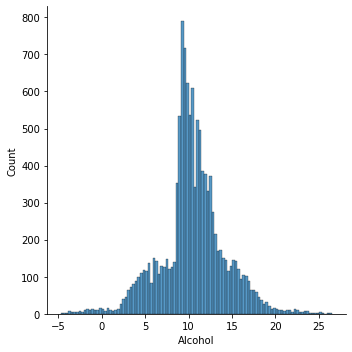

In [492]:
sns.displot(df['Alcohol'])

You can clearly see a sort of 'bell curve' favorite alcohols near the 7-15 percent range

Next lets take a look at the Stars Index, which serves as an overall rating of the wines

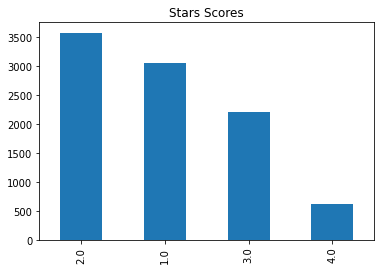

In [493]:
%matplotlib inline

splt = df['STARS'].value_counts().plot.bar(title = "Stars Scores")
splt;

So as to be expected, the majority of wines did not make the top tier of being a 4.0. The majority are bunched into the 2.0 and 1.0 areas of the scale.

However now knowing both of these, we test and see how the target relates to the star score. Do more people buy the more highly rated wines?

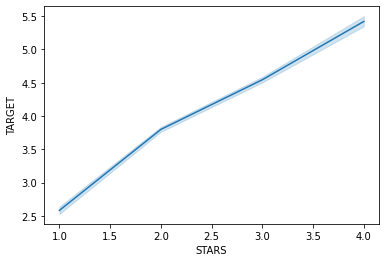

In [494]:
sns.lineplot(data=df['STARS'], x=df['STARS'], y=df['TARGET'])

And using our data analysis we are able to see that indeed this is true. The target of a wine seems to be directly related to it's stars rating

So now we can also check the alcohol content

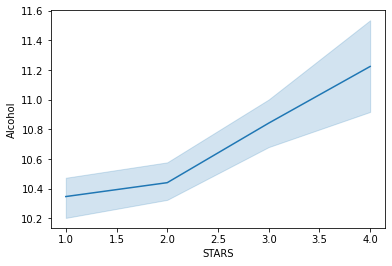

In [495]:
sns.lineplot(data=df['STARS'], x=df['STARS'], y=df['Alcohol'])

These analysis techniques allow us to see characteristics of the data we would miss. However it should be important to note that the data itself is not completely accurate. There are some discrepencies that we should be aware of.

### Data Cleansing and Preparation 
To begin our data preperation we should start by cleaning our data. The first thing we can do is to find and replace any values that are missing within our data set. These missing values can cause unwanted discrepencies in our data and they should be accounted for. 

To do this I will find all NaN's, and replace them with the mean value of their respective column. This will improve data integrity without the need to remove these sets of data.

In [496]:
#First I will print out the amount of NaN's within each columns
print('BEFORE NANS REMOVED')
print(df['INDEX'].isnull().sum())
print(df['TARGET'].isnull().sum())
print(df['FixedAcidity'].isnull().sum())
print(df['VolatileAcidity'].isnull().sum())
print(df['CitricAcid'].isnull().sum())
print(df['ResidualSugar'].isnull().sum())
print(df['Chlorides'].isnull().sum())
print(df['FreeSulfurDioxide'].isnull().sum())
print(df['TotalSulfurDioxide'].isnull().sum())
print(df['Density'].isnull().sum())
print(df['pH'].isnull().sum())
print(df['Sulphates'].isnull().sum())
print(df['Alcohol'].isnull().sum())
print(df['LabelAppeal'].isnull().sum())
print(df['AcidIndex'].isnull().sum())
print(df['STARS'].isnull().sum())

#Then I will replace those values with the mean of their respective column
df['ResidualSugar'].fillna(df['ResidualSugar'].mean(), inplace = True)
df['Chlorides'].fillna(df['Chlorides'].mean(), inplace = True)
df['FreeSulfurDioxide'].fillna(df['FreeSulfurDioxide'].mean(), inplace = True)
df['TotalSulfurDioxide'].fillna(df['TotalSulfurDioxide'].mean(), inplace = True)
df['pH'].fillna(df['pH'].mean(), inplace = True)
df['Sulphates'].fillna(df['Sulphates'].mean(), inplace = True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace = True)
df['STARS'].fillna(df['STARS'].mean(), inplace = True)

#Then I will check again to see if NaN's still exist. 
#If they do not, then I have suceeeded in cleaning this aspect of the data set.
print('\nAFTER NANS REMOVED')
print(df['INDEX'].isnull().sum())
print(df['TARGET'].isnull().sum())
print(df['FixedAcidity'].isnull().sum())
print(df['VolatileAcidity'].isnull().sum())
print(df['CitricAcid'].isnull().sum())
print(df['ResidualSugar'].isnull().sum())
print(df['Chlorides'].isnull().sum())
print(df['FreeSulfurDioxide'].isnull().sum())
print(df['TotalSulfurDioxide'].isnull().sum())
print(df['Density'].isnull().sum())
print(df['pH'].isnull().sum())
print(df['Sulphates'].isnull().sum())
print(df['Alcohol'].isnull().sum())
print(df['LabelAppeal'].isnull().sum())
print(df['AcidIndex'].isnull().sum())
print(df['STARS'].isnull().sum())

df

BEFORE NANS REMOVED
0
0
0
0
0
616
638
647
682
0
395
1210
653
0
0
3359

AFTER NANS REMOVED
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.200000,-0.567000,30.845571,268.000000,0.99280,3.33,-0.590000,9.900000,0,8,2.000000
1,2,3,4.5,0.160,-0.81,26.100000,-0.425000,15.000000,-327.000000,1.02792,3.38,0.700000,10.489236,-1,7,3.000000
2,4,5,7.1,2.640,-0.88,14.800000,0.037000,214.000000,142.000000,0.99518,3.12,0.480000,22.000000,-1,8,3.000000
3,5,3,5.7,0.385,0.04,18.800000,-0.425000,22.000000,115.000000,0.99640,2.24,1.830000,6.200000,-1,6,1.000000
4,6,4,8.0,0.330,-1.26,9.400000,0.054822,-167.000000,108.000000,0.99457,3.12,1.770000,13.700000,0,9,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,-0.790,2.01,5.000000,0.043000,17.000000,101.000000,1.01077,3.39,0.570000,4.900000,1,5,2.041755
12791,16123,5,8.9,0.470,0.29,84.900000,0.259000,54.000000,120.714233,0.99518,4.46,-1.200000,10.489236,-1,8,2.000000
12792,16127,4,6.0,0.170,-1.10,37.000000,0.078000,25.000000,108.000000,0.99076,3.25,0.527112,12.300000,0,6,2.000000
12793,16128,3,7.7,0.320,0.12,5.418733,0.029000,26.000000,274.000000,0.99060,3.97,0.620000,11.000000,-1,6,2.000000


### Scaling Data

The next thing to do is try and find values to scale. For example, I see right away that the Residual Sugar, Free Sulfur Dioxide and Total Sulfur Dioxide attributes all are in very large number quantities. As compared to the other attributes of the data frame, these might cause disparities when trying to compare data. So it seems fit that I should try and scale these attributes.

To scale them I will divide them by a factor of 10 to decrease the number. Also since they are floats, the decimal points will remain intact in case an exact measurement is needed.

In [497]:
df['ResidualSugar'] = df['ResidualSugar'] / 10
df['FreeSulfurDioxide'] = df['FreeSulfurDioxide'] / 10
df['TotalSulfurDioxide'] = df['TotalSulfurDioxide'] / 10
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,5.420000,-0.567000,3.084557,26.800000,0.99280,3.33,-0.590000,9.900000,0,8,2.000000
1,2,3,4.5,0.160,-0.81,2.610000,-0.425000,1.500000,-32.700000,1.02792,3.38,0.700000,10.489236,-1,7,3.000000
2,4,5,7.1,2.640,-0.88,1.480000,0.037000,21.400000,14.200000,0.99518,3.12,0.480000,22.000000,-1,8,3.000000
3,5,3,5.7,0.385,0.04,1.880000,-0.425000,2.200000,11.500000,0.99640,2.24,1.830000,6.200000,-1,6,1.000000
4,6,4,8.0,0.330,-1.26,0.940000,0.054822,-16.700000,10.800000,0.99457,3.12,1.770000,13.700000,0,9,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,-0.790,2.01,0.500000,0.043000,1.700000,10.100000,1.01077,3.39,0.570000,4.900000,1,5,2.041755
12791,16123,5,8.9,0.470,0.29,8.490000,0.259000,5.400000,12.071423,0.99518,4.46,-1.200000,10.489236,-1,8,2.000000
12792,16127,4,6.0,0.170,-1.10,3.700000,0.078000,2.500000,10.800000,0.99076,3.25,0.527112,12.300000,0,6,2.000000
12793,16128,3,7.7,0.320,0.12,0.541873,0.029000,2.600000,27.400000,0.99060,3.97,0.620000,11.000000,-1,6,2.000000


## Re-Running EDA Analysis

Now that we have finished cleaning and organizing the data, we should take a look at our analysis again to see if anything has changed.

Lets start with the target values since we have removed all the NaN's. We will be able to see if the NaNs were influencing the data in any way

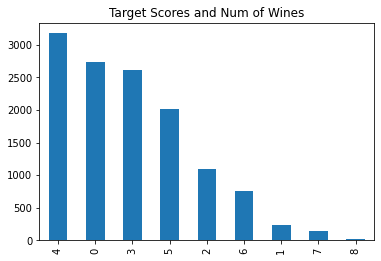

In [498]:
%matplotlib inline

taplt = df['TARGET'].value_counts().plot.bar(title = "Target Scores and Num of Wines")
taplt;

As you can see not much has changed. However when looking at attributes that we know had a lot of missing values previously, we can see the differences clearly. For example, the star scores vs alchol levels changed quite a bit.

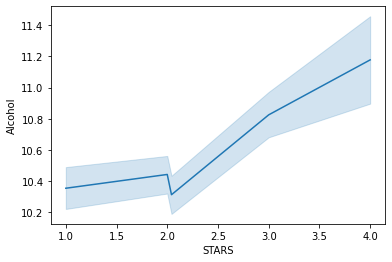

In [499]:
sns.lineplot(data=df['STARS'], x=df['STARS'], y=df['Alcohol'])

In fact, lets take a look at the overall data for alcohol level now that it's been cleaned

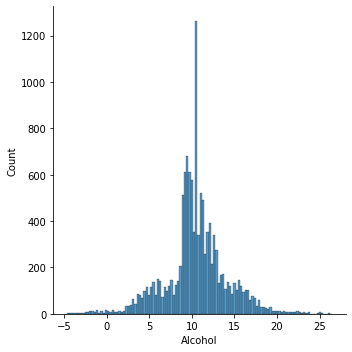

In [500]:
sns.displot(df['Alcohol'])

We can see a small, but not huge difference here. Showing that the few values that had to be re-scaled did not affect the overall data frame. This is what we were aiming for as replacing them with the 'mean' value usually maintains data integrity.

We should also take a look at the value we had to scale to see if their graphs are more readable.

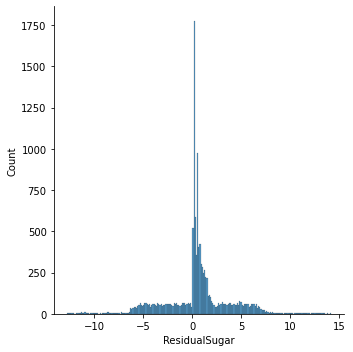

In [501]:
sns.displot(df['ResidualSugar'])

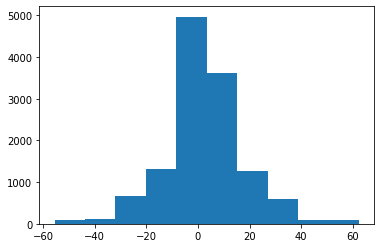

In [502]:
plt.hist(df['FreeSulfurDioxide']);

So you can see how the values here are on a small scale and can now be more easily organized

## Conclusion

In conclusion we are now able to more adequately assess the data set after cleansing and scaling many aspects of it. By analyzing the graph patterns before and after, we are able to see how the small changes made can overall improve the data and help us get ready for the next steps. Cleansing data is an important step that must be taken to insure the data is not only correct, but able to withstand the various algorithms and restructers it will go through during the rest of our data analysis

## Sources
https://seaborn.pydata.org/generated/seaborn.displot.html
https://datatofish.com/check-nan-pandas-dataframe/
https://stackoverflow.com/questions/29299597/python-pandas-replace-values-by-their-opposite-sign
https://seaborn.pydata.org/generated/seaborn.lineplot.html
https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe